Wczytanie wyczyszconych danych

In [1]:
import ast
import pandas as pd

In [2]:
reviews = pd.read_csv('../cleaned_datasets/hotel_reviews.csv', sep='\t', encoding='utf-8')
reviews['review_clean_tokens'] = reviews['review_clean_tokens'].apply(ast.literal_eval)
reviews = reviews.dropna(how="any", axis=0)
reviews['label'] = reviews['label'].apply(lambda label: label - 1)
reviews

,label,review,length,review_clean_tokens,review_clean
0,3,nice hotel expensive parking got good deal sta...,593,"[nice, expens, park, got, good, deal, stay, an...",nice expens park got good deal stay anniversar...
1,1,ok nothing special charge diamond member hilto...,1689,"[ok, noth, special, charg, diamond, member, hi...",ok noth special charg diamond member hilton de...
2,2,nice rooms not 4* experience hotel monaco seat...,1427,"[nice, room, experi, monaco, seattl, good, nt,...",nice room experi monaco seattl good nt levelpo...
3,4,"unique, great stay, wonderful time hotel monac...",600,"[uniqu, great, stay, wonder, time, monaco, loc...",uniqu great stay wonder time monaco locat exce...
4,4,"great stay great stay, went seahawk game aweso...",1281,"[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...
...,...,...,...,...,...
20486,4,"best kept secret 3rd time staying charm, not 5...",733,"[best, kept, secret, time, stay, charm, nt, be...",best kept secret time stay charm nt beat time ...
20487,3,great location price view hotel great quick pl...,306,"[great, locat, price, view, great, quick, plac...",great locat price view great quick place sight...
20488,1,"ok just looks nice modern outside, desk staff ...",443,"[ok, look, nice, modern, outsid, desk, staff, ...",ok look nice modern outsid desk staff nt parti...
20489,0,hotel theft ruined vacation hotel opened sept ...,5557,"[theft, ruin, vacat, open, sept, guest, week, ...",theft ruin vacat open sept guest week happi st...


Wizualizacja tokenów

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

1 gwiazdka

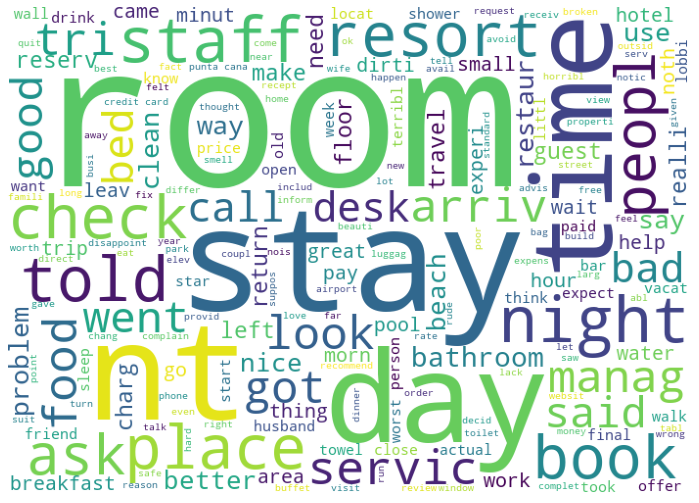

In [27]:
one_star_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
one_star_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 0, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(one_star_word_cloud)
plt.show()

2 gwiazdki

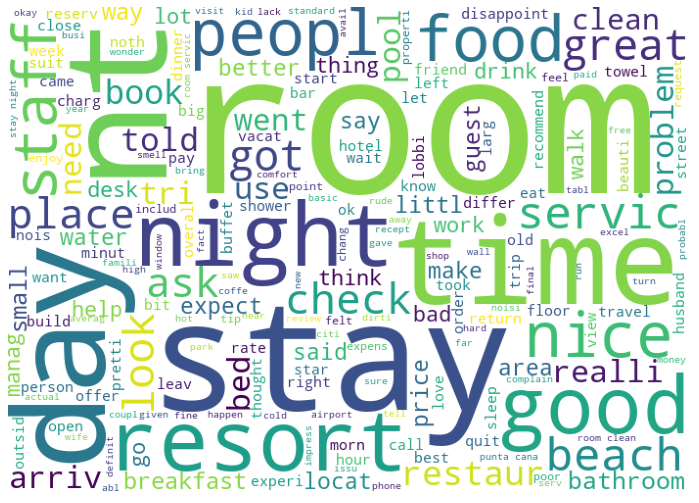

In [28]:
two_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
two_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 1, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(two_stars_word_cloud)
plt.show()

3 gwiazdki

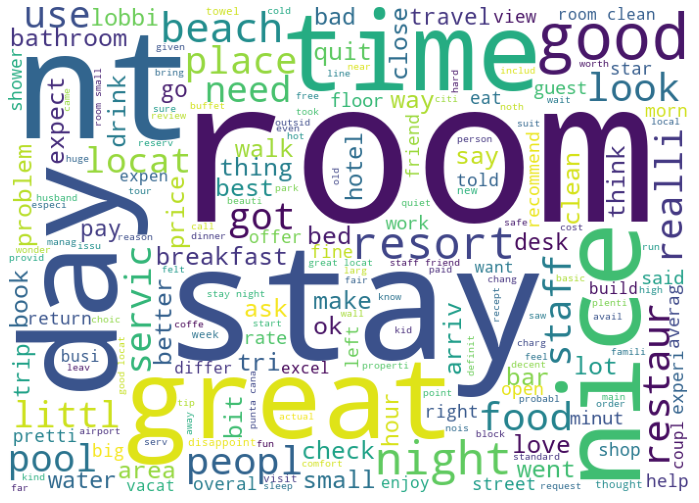

In [29]:
three_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
three_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 2, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(three_stars_word_cloud)
plt.show()

4 gwiazdki

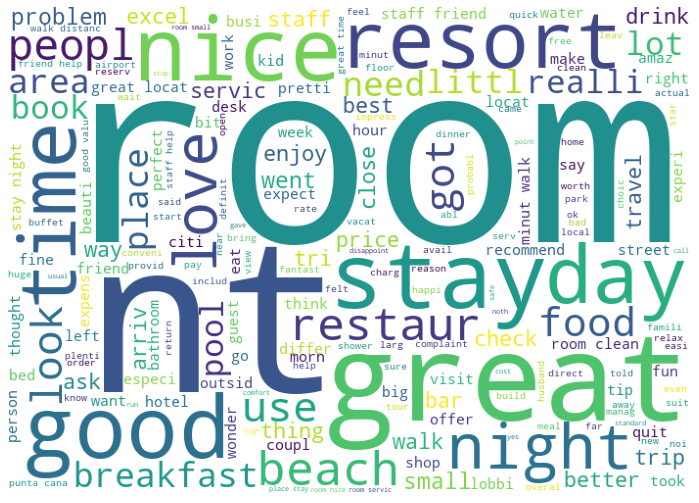

In [30]:
four_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
four_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 3, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(four_stars_word_cloud)
plt.show()

5 gwiazdek

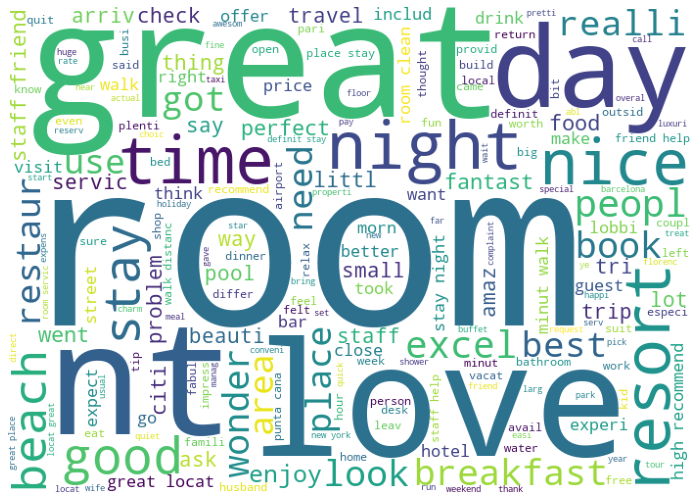

In [31]:
five_stars_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
five_stars_word_cloud.generate(' '.join(text for text in reviews.loc[reviews['label'] == 4, 'review_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(five_stars_word_cloud)
plt.show()

Wektoryzacja

In [3]:
x = reviews['review_clean']
y = reviews['label']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1337)

count_vectorizer = CountVectorizer(
	stop_words='english',
	ngram_range=(1, 2),
	max_features=100
)

x_train_count_matrix = count_vectorizer.fit_transform(x_train)
x_test_count_matrix = count_vectorizer.transform(x_test)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count_matrix)
x_test_tfidf = tfidf_transformer.transform(x_test_count_matrix)

Modelowanie

In [6]:
# multinomial bayes

from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_tfidf, y_train)
y_pred_class = multinomial_nb.predict(x_test_tfidf)
y_pred_prob = multinomial_nb.predict_proba(x_test_count_matrix)[:, 1]

In [18]:
from sklearn import metrics
# print(metrics.confusion_matrix(y_test, y_pred_class))
# print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

0.1874002423102668


In [19]:
# svm
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train_tfidf, y_train)
y_pred_class = svm.predict(x_test_tfidf)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

[[ 146   60    7   28   43]
 [  70   89   18  105   77]
 [  17   53   28  239  100]
 [  19   33   17  564  575]
 [  21   29    9  349 1403]]
0.5440351305196389
[0.51408451 0.24791086 0.06407323 0.46688742 0.7747101 ]
0.41353322384591606
[0.53479853 0.33712121 0.35443038 0.43891051 0.63830755]
0.46071363696468987
[0.52423698 0.28571429 0.10852713 0.45246691 0.69992517]
0.4141740954101921


In [20]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_tfidf, y_train)
y_pred_class = knn.predict(x_test_tfidf)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

[[ 111   62   37   34   40]
 [  69   64   61  103   62]
 [  48   38   71  171  109]
 [  45   52  135  504  472]
 [  52   58  100  505 1096]]
0.45035374481580875
[0.39084507 0.17827298 0.1624714  0.41721854 0.6051905 ]
0.35079969846722153
[0.34153846 0.23357664 0.17574257 0.38268793 0.61607645]
0.3499244105362197
[0.36453202 0.20221169 0.16884661 0.39920792 0.61058496]
0.3490766400508604


Tokenizacja lstm

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews['review_clean'])
total_words = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(reviews['review_clean'])
max_sequence_len = min(max(len(seq) for seq in sequences), 100)
padded_sequences = pad_sequences(
	sequences,
	max_sequence_len,
	padding='pre'
)
x_lstm = padded_sequences
y_lstm = reviews['label']
x_lstm_train, x_lstm_test, y_lstm_train, y_lstm_test = train_test_split(x_lstm, y_lstm, train_size=0.8, stratify=y_lstm, random_state=1337)

In [33]:
from keras import Sequential
from keras import layers
# lstm
model = Sequential()
model.add(layers.Embedding(input_dim=total_words, output_dim=64, input_length=max_sequence_len))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(
    x_lstm_train,
    y_lstm_train,
    epochs = 5,
    batch_size = 16,
	validation_data = (x_lstm_test, y_lstm_test),
)

Epoch 1/5
1025/1025 [==============================] - 77s 73ms/step - loss: 1.1556 - accuracy: 0.4913 - val_loss: 0.9993 - val_accuracy: 0.5553
Epoch 2/5
1025/1025 [==============================] - 68s 66ms/step - loss: 0.8747 - accuracy: 0.6280 - val_loss: 0.9546 - val_accuracy: 0.5804
Epoch 3/5
1025/1025 [==============================] - 75s 73ms/step - loss: 0.6225 - accuracy: 0.7553 - val_loss: 1.0490 - val_accuracy: 0.5897
Epoch 4/5
1025/1025 [==============================] - 76s 74ms/step - loss: 0.3891 - accuracy: 0.8606 - val_loss: 1.3316 - val_accuracy: 0.5684
Epoch 5/5
1025/1025 [==============================] - 64s 62ms/step - loss: 0.2387 - accuracy: 0.9211 - val_loss: 1.5793 - val_accuracy: 0.5292


In [40]:
model.save('hotel_reviews_model.h5')
import numpy as np

y_pred_class = np.argmax(model.predict(x_lstm_test), axis=1)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

[[ 147  106   21    8    2]
 [  59  166   82   37   15]
 [  10  111  159  118   39]
 [   9   92  176  505  426]
 [  18   54   89  458 1192]]
0.5291534520614785
[0.51760563 0.46239554 0.36384439 0.41804636 0.65819989]
0.48401836355013056
[0.60493827 0.31379962 0.30170778 0.44849023 0.71206691]
0.47620056198808136
[0.55787476 0.37387387 0.32987552 0.4327335  0.68407461]
0.47568645310385965
